In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/sac_find_best_relax.csv')
df.drop('name', axis=1, inplace=True)

flop = df['size'] * df['size'] * (2 * df['size'] - 1)
df['MFLOP/J'] = (flop / 1e6) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']

df

,size,threads,runtime,runtimesd,energy,energysd,MFLOP/J,GFLOP/s
0,100,1,2.930000e-06,1.300000e-07,0.000079,0.001123,2.513896e+04,679.180887
1,100,2,1.610000e-06,1.100000e-07,0.000116,0.001387,1.711533e+04,1236.024845
2,100,3,1.310000e-06,2.000000e-07,0.000117,0.001514,1.697228e+04,1519.083969
3,100,4,1.090000e-06,2.000000e-08,0.000059,0.001077,3.378608e+04,1825.688073
4,100,5,9.500000e-07,5.000000e-08,0.000112,0.001579,1.779646e+04,2094.736842
5,100,6,8.200000e-07,5.000000e-08,0.000093,0.001470,2.143704e+04,2426.829268
6,100,7,8.200000e-07,5.000000e-08,0.000157,0.002026,1.269133e+04,2426.829268
7,100,8,7.900000e-07,4.000000e-08,0.000148,0.001904,1.348421e+04,2518.987342
8,100,9,7.400000e-07,1.100000e-07,0.000174,0.002248,1.141186e+04,2689.189189
9,100,10,6.800000e-07,5.000000e-08,0.000138,0.001951,1.446536e+04,2926.470588


In [4]:
#df_grouped = df.groupby(['size', 'pin'])
df_grouped = df.groupby('size')

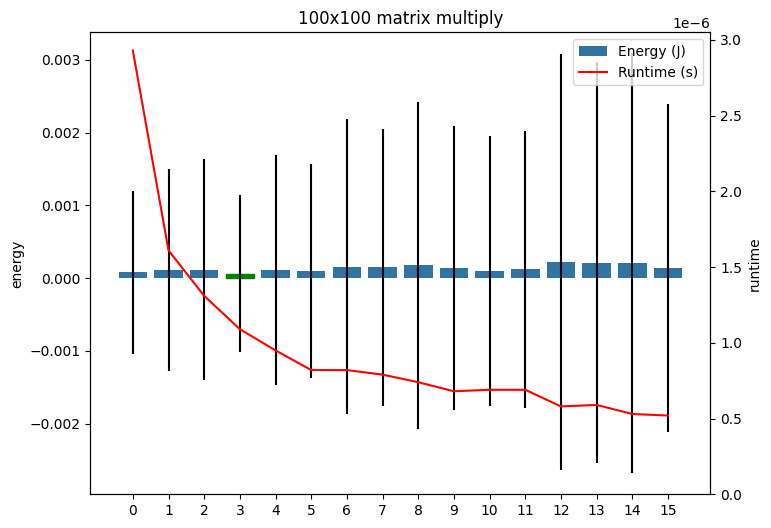

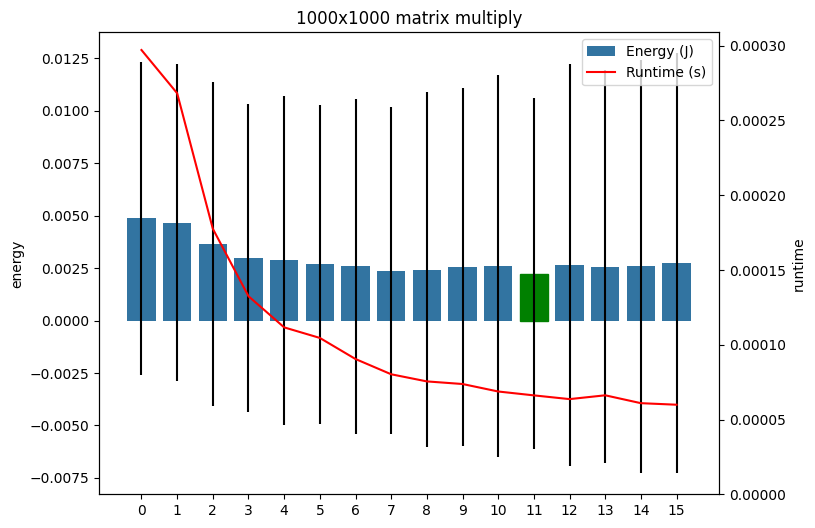

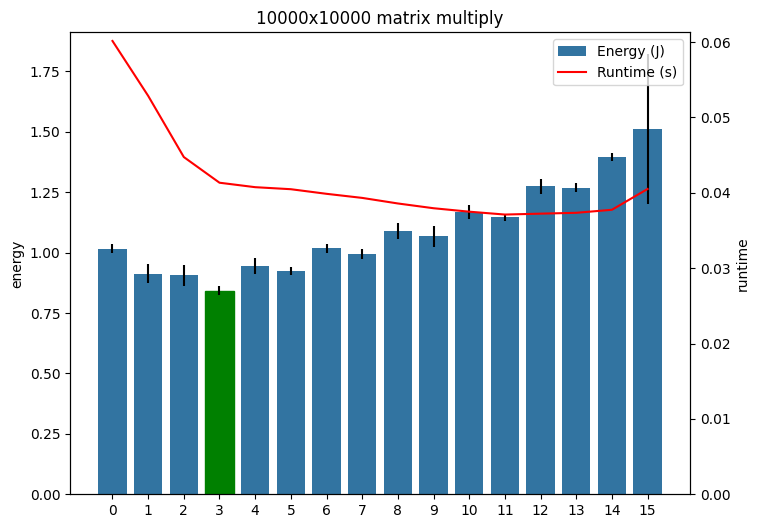

In [5]:
for size, dfx in df_grouped:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['energy'], label='Energy (J)', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['runtime'], label='Runtime (s)', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply')#; {'w/' if pin else 'w/o'} pinning')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=dfx['energy'], yerr=dfx['energysd'], fmt='none', c='black')

    for bar in ax.patches:
        if bar.get_height() == dfx['energy'].min():
            bar.set_color('g')
            break

plt.show()

/tmp/ipykernel_206748/1063131660.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,6))


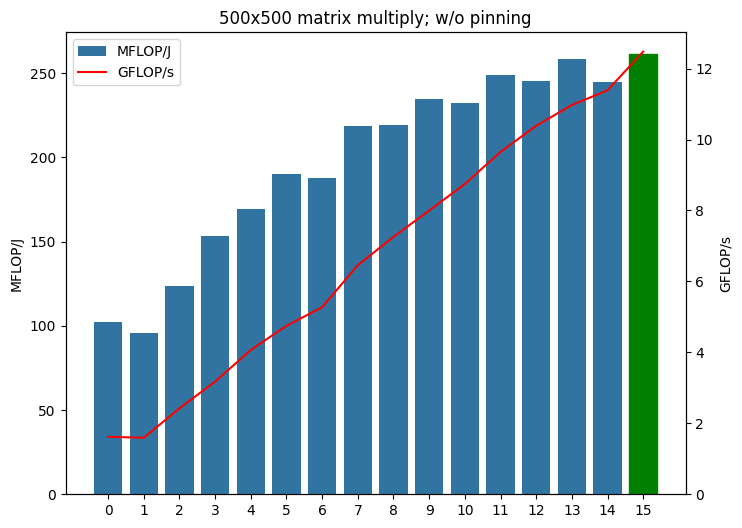

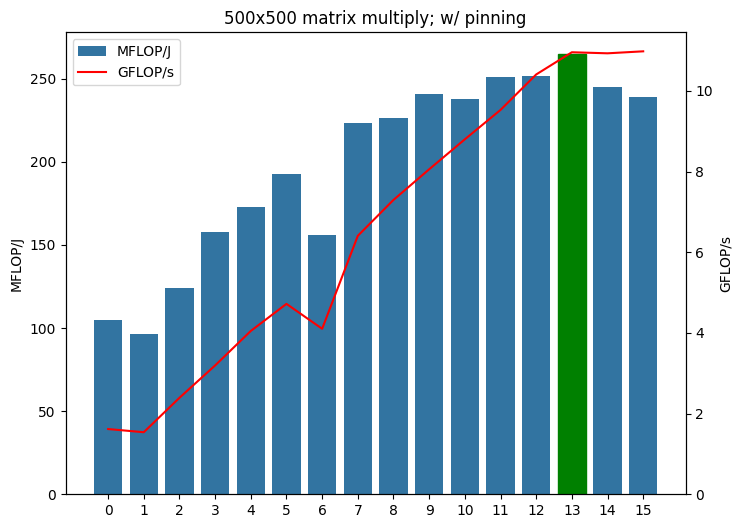

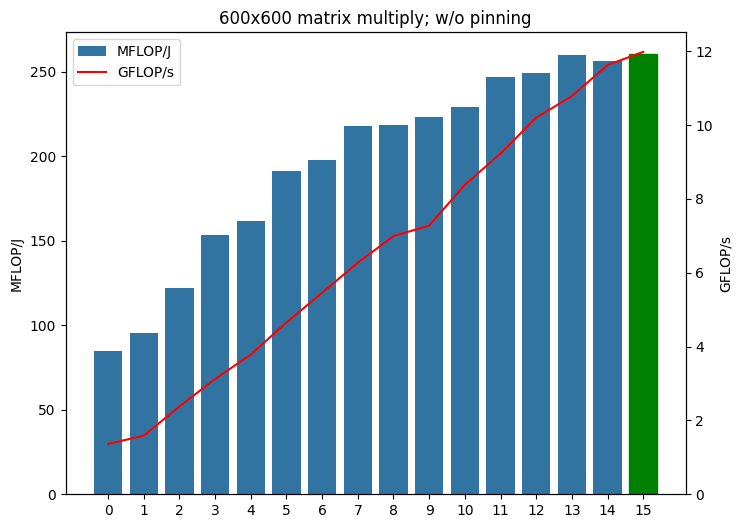

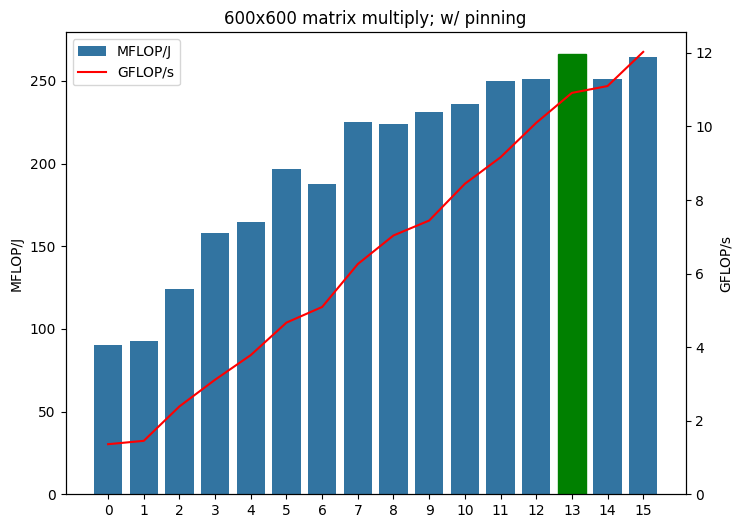

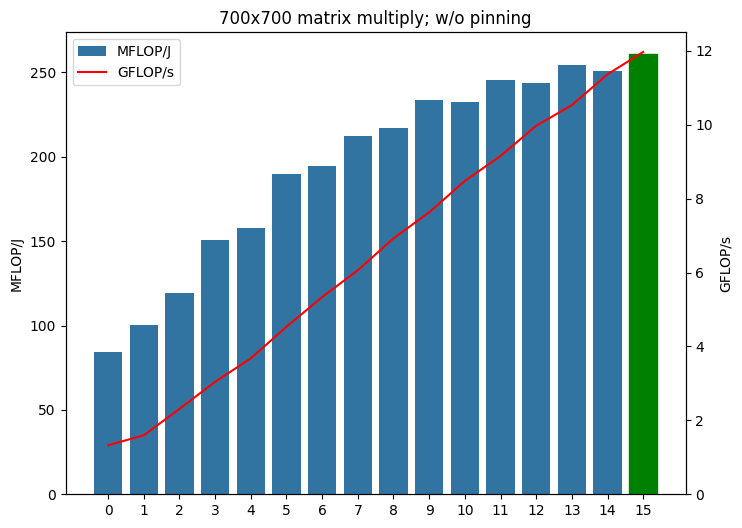

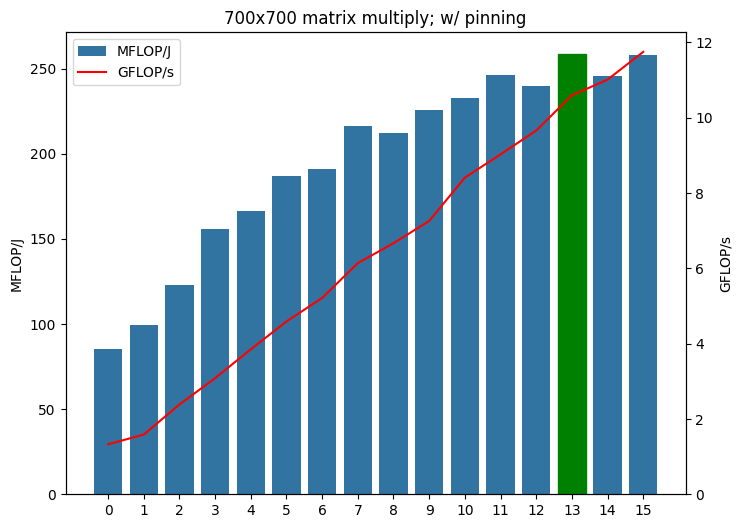

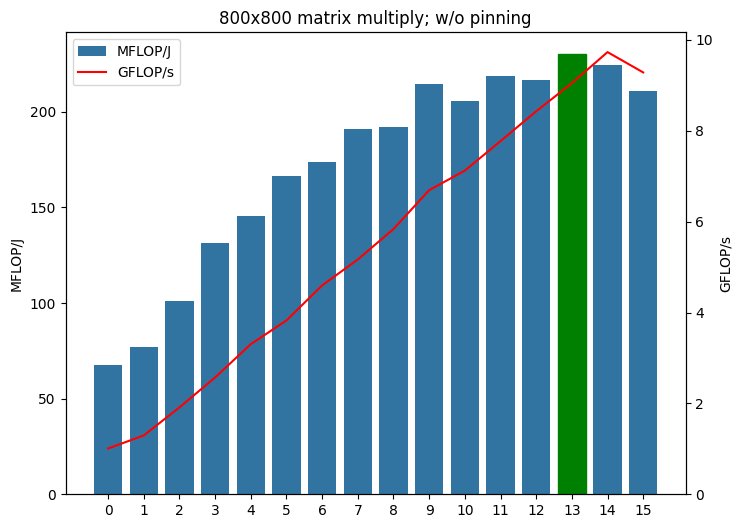

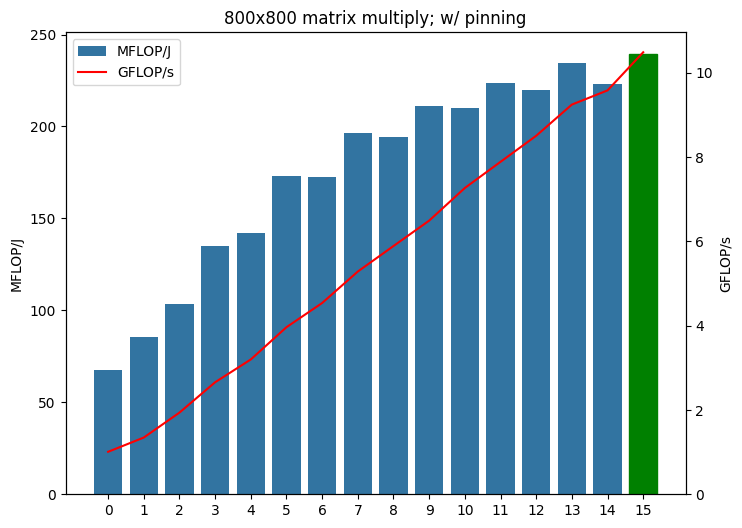

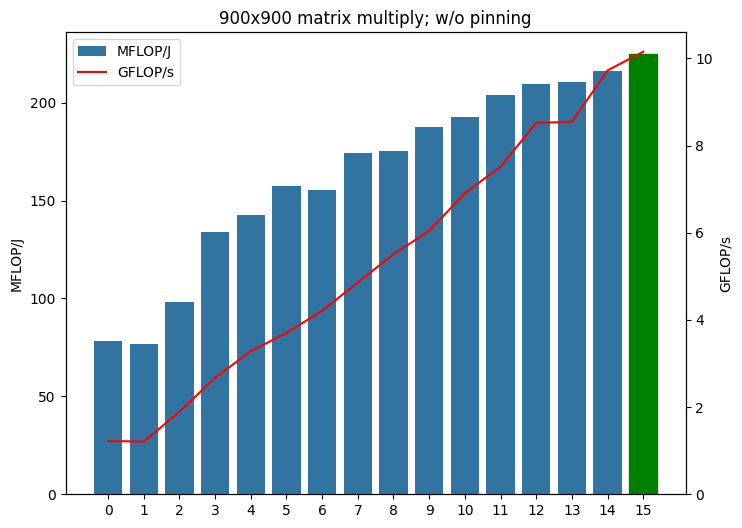

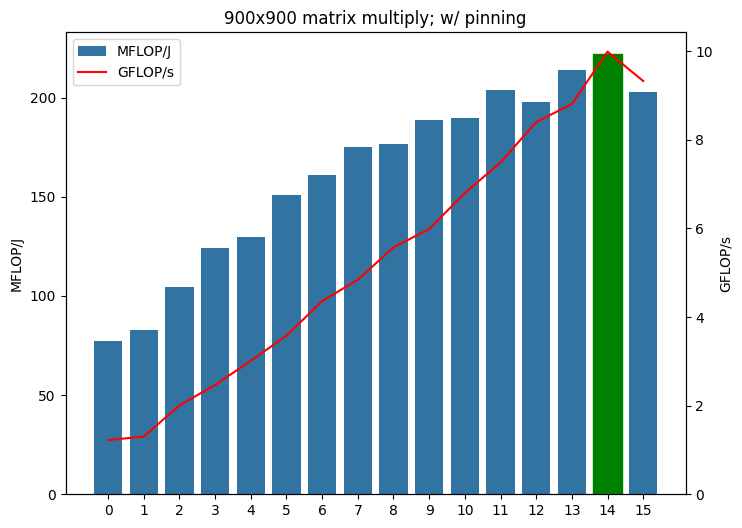

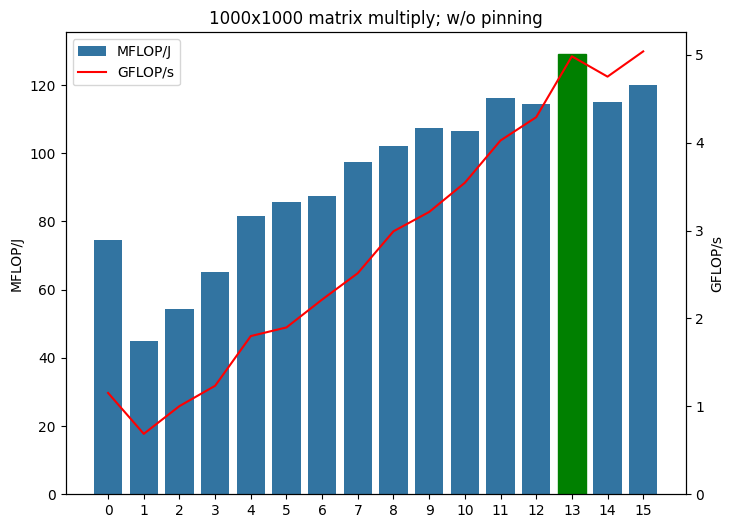

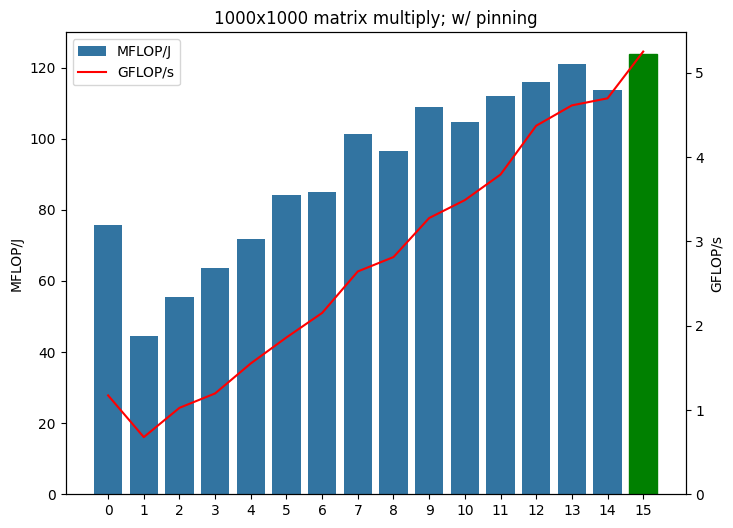

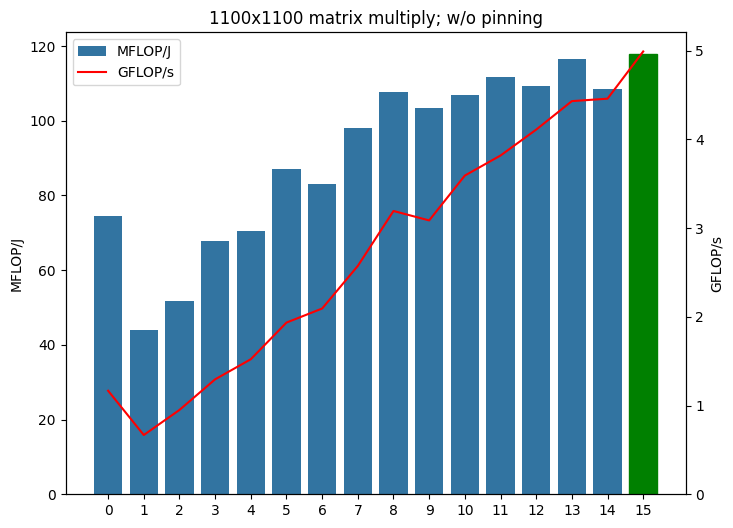

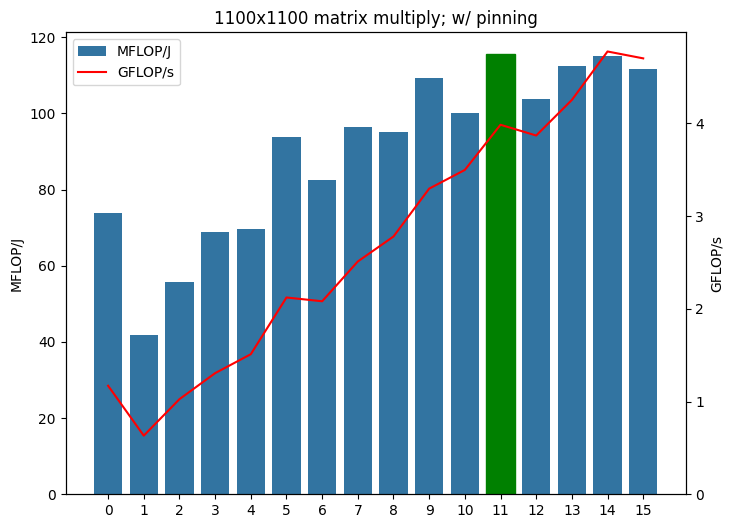

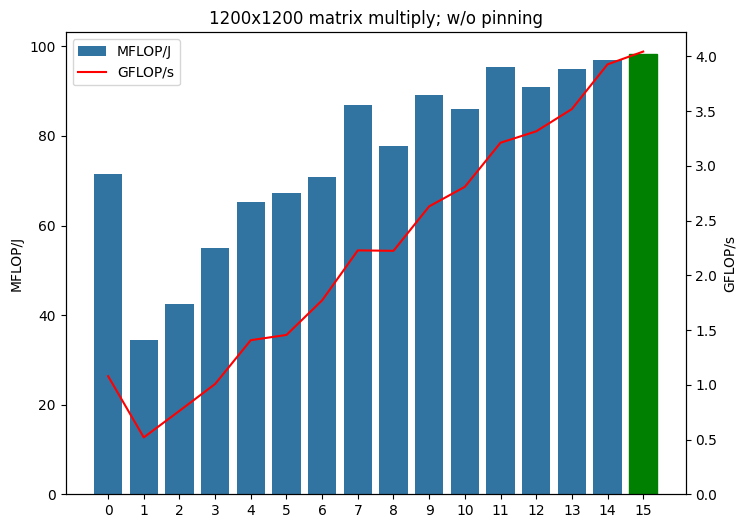

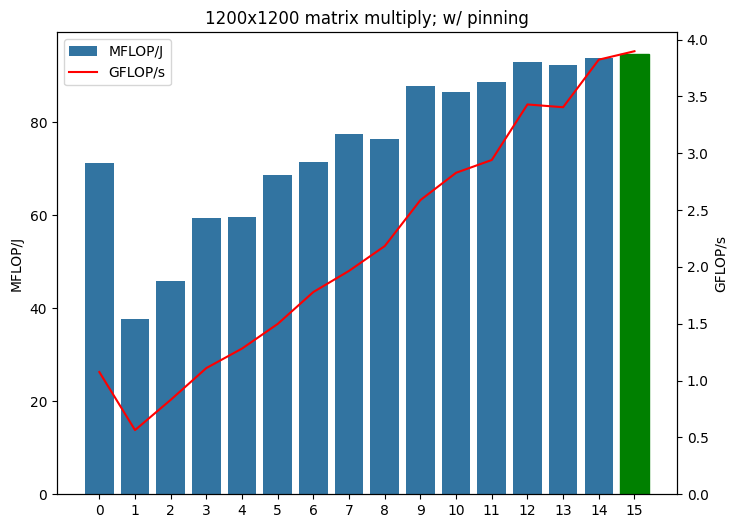

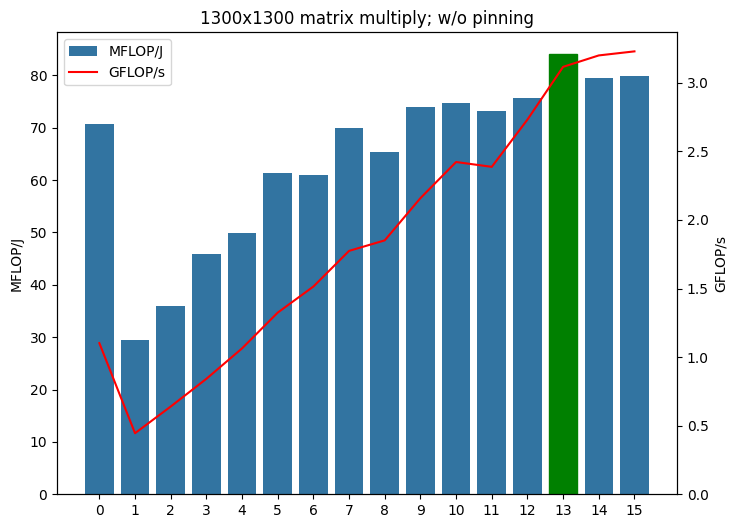

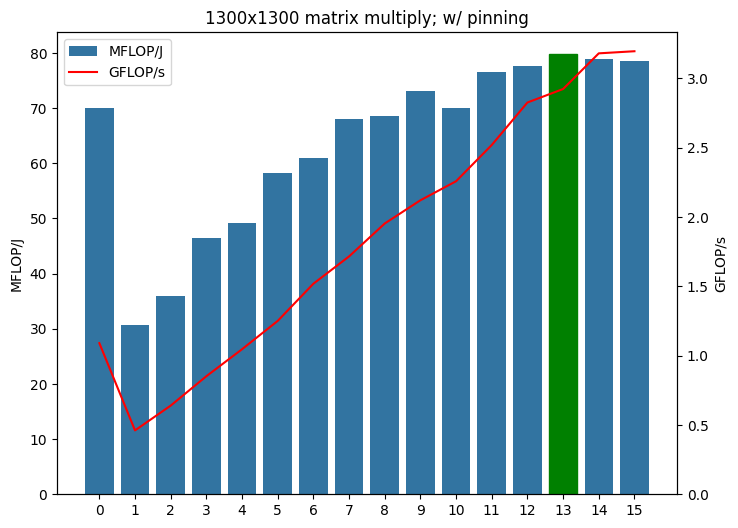

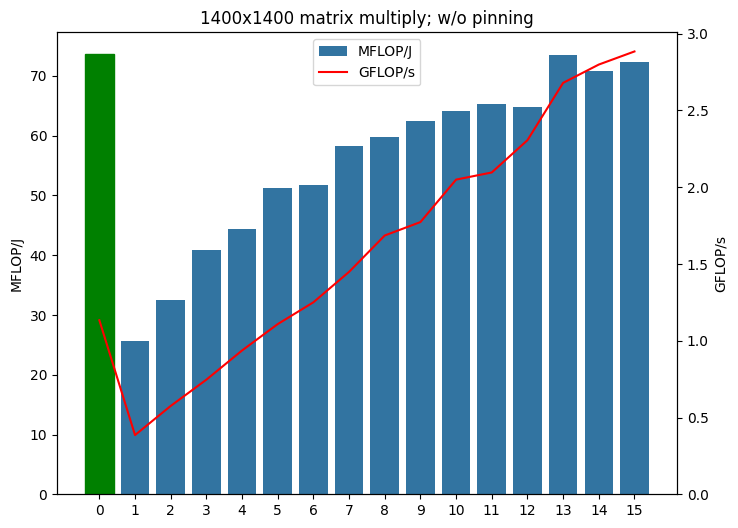

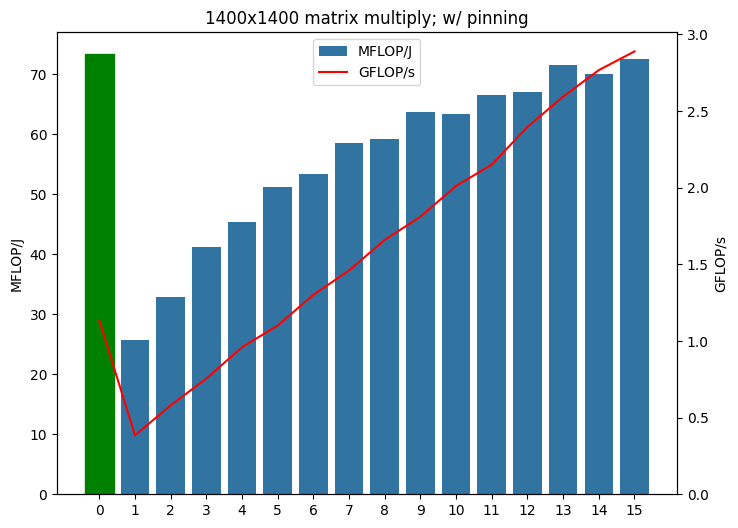

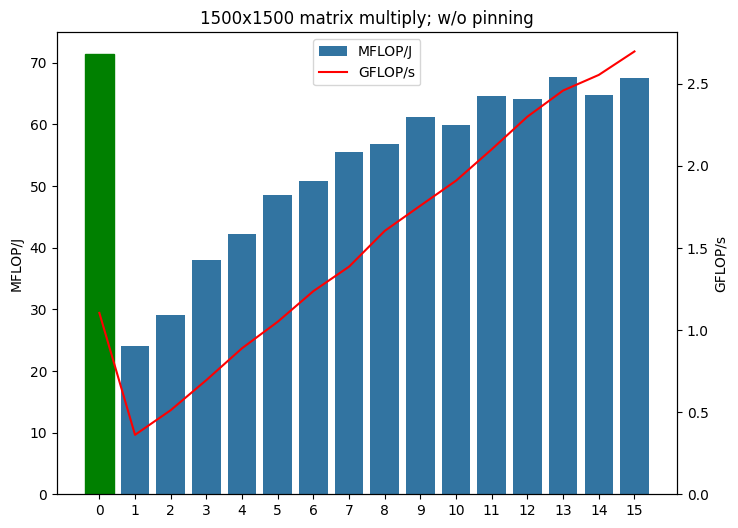

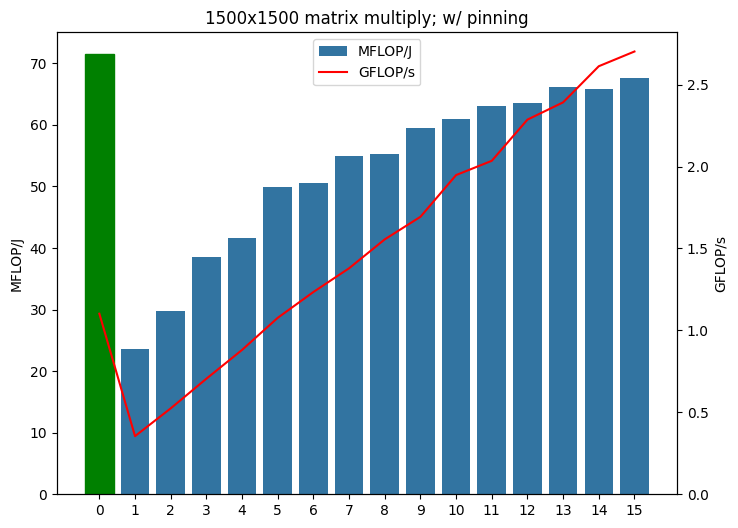

In [7]:
for (size, pin), dfx in df_grouped:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['MFLOP/J'], label='MFLOP/J', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['GFLOP/s'], label='GFLOP/s', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply; {'w/' if pin else 'w/o'} pinning')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    for bar in ax.patches:
        if bar.get_height() == dfx['MFLOP/J'].max():
            bar.set_color('g')
            break

plt.show()